# Mounting the Drive and Creating Save Folder

In [ ]:
# Import the necessary libraries
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')

# Create a folder in Google Drive
folder_name = 'albert_models'
folder_path = '/content/drive/MyDrive/' + folder_name
!mkdir "{folder_path}"

Mounted at /content/drive
mkdir: cannot create directory ‘/content/drive/MyDrive/albert_models’: File exists


# Uploading the Dataset

In [ ]:
import pandas as pd
import numpy as np
data_path = '/content/labeled_data.csv'
hate_speech = pd.read_csv(data_path)
print(hate_speech.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


# Cleaning the Dataset

In [ ]:
import re
hate_speech = hate_speech.drop('count', axis=1)
data_df = hate_speech
data_df = data_df.rename(columns={data_df.columns[0]: 'index'})
data_df = data_df.drop('index', axis=1)
data_df = data_df.drop('hate_speech', axis=1)
data_df = data_df.drop('neither', axis=1)
data_df = data_df.drop('offensive_language', axis=1)
data_df['tweet'] = data_df['tweet'].str.replace('@.*?:', '', regex=True)
data_df['tweet'] = data_df['tweet'].str.replace('@.*?;', '', regex=True)
data_df['tweet'] = data_df['tweet'].str.replace('(http\S+|www\.\S+)', '', regex=True)
df = data_df
pattern = re.compile(r'([^\w\s])(?=\1)')
df['tweet'] = df['tweet'].apply(lambda x: re.sub(pattern, '', x))
data_df = df
print(data_df.head())

   class                                              tweet
0      2  ! RT  As a woman you shouldn't complain about ...
1      1  ! RT  boy dats cold.tyga dwn bad for cuffin da...
2      1  ! RT  You ever fuck a bitch and she start to c...
3      1           ! RT  @viva_based she look like a tranny
4      1  ! RT  The shit you hear about me might be true...


# Creating a Sample Dataset

In [ ]:
import pandas as pd

df = data_df

sample_df = df.sample(frac=1)
augmented_df = sample_df

# Print the sizes of the original and sample dataframes
print('Original dataframe size:', df.shape)
print('Sample dataframe size:', sample_df.shape)

Original dataframe size: (24783, 2)
Sample dataframe size: (24783, 2)


# Word Swapping

In [ ]:
import pandas as pd
import nltk
import random

nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

df = sample_df

columns_to_keep = ['tweet', 'class']
augmented_data = []

def word_swap(text):
    # tokenize the text into words
    words = nltk.word_tokenize(text)

    # get the part-of-speech tags for the words
    pos_tags = nltk.pos_tag(words)

    swapped_words = []

    # iterate over each word and its tag
    for word, tag in pos_tags:
        # if the word is a noun, verb, adjective, or adverb, try to find a synonym
        if tag.startswith('N') or tag.startswith('V') or tag.startswith('J') or tag.startswith('R'):
            synonyms = nltk.corpus.wordnet.synsets(word)
            if synonyms:
                synonym = random.choice(synonyms).lemmas()[0].name()
                swapped_words.append(synonym)
            else:
                swapped_words.append(word)
        else:
            swapped_words.append(word)

    # join the swapped words back into a single string
    swapped_text = ' '.join(swapped_words)

    return swapped_text

# iterate over each row in the original dataset
for index, row in df.iterrows():
    # get the tweet text and class label
    tweet = row['tweet']
    label = row['class']

    # add the original tweet to the augmented data
    augmented_data.append({'tweet': tweet, 'class': label})

    # perform word swapping on the tweet text for class 0 and 2 only
    if label == 0:
        for i in range(6):
            swapped_text = word_swap(tweet)
            augmented_data.append({'tweet': swapped_text, 'class': label})
    elif label == 2:
        for i in range(2):
            swapped_text = word_swap(tweet)
            augmented_data.append({'tweet': swapped_text, 'class': label})

# convert the augmented data to a DataFrame
augmented_df = pd.DataFrame(augmented_data, columns=columns_to_keep)

# print the first few rows of the augmented dataset
print(augmented_df.head())

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                               tweet  class
0  &#128114;&#128069;&#128166;&#128149; - &#12851...      1
1  @OfficialSkai dont tell me what to do. fuck ba...      0
2  @ OfficialSkai dont assure me what to do . sle...      0
3  @ OfficialSkai dont tell me what to practice ....      0
4  @ OfficialSkai dont Tell me what to do . sleep...      0



# Visulalizing the Class Count in Sample Data

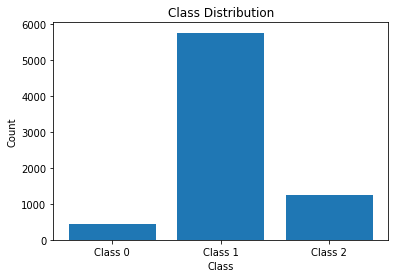

In [ ]:
import matplotlib.pyplot as plt

# Sample labels
labels = result['class']

# Plot the classes
plt.hist(labels, bins=range(4), align='left', rwidth=0.8)

# Set the x-axis tick labels
plt.xticks(range(3), ['Class 0', 'Class 1', 'Class 2'])

# Set the axis labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# Show the plot
plt.show()

# Visulalizing the Class Count in Augmented Data

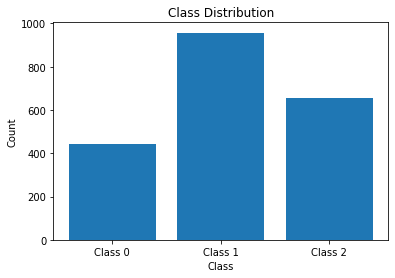

In [ ]:
import matplotlib.pyplot as plt

# Sample labels
labels = augmented_df['class']

# Plot the classes

plt.hist(labels, bins=range(4), align='left', rwidth=0.8)

# Set the x-axis tick labels
plt.xticks(range(3), ['Class 0', 'Class 1', 'Class 2'])

# Set the axis labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# Show the plot
plt.show()

# Installing necessary elements

In [ ]:
!pip install transformers
!pip install sentencepiece
import torch
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import AlbertTokenizer,  AdamW
from torch.cuda.amp import GradScaler, autocast
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import seaborn as sns
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Defining Alberta Model

In [ ]:
import torch
import torch.nn as nn
from transformers import AlbertTokenizer, AlbertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback, AlbertModel, AdamW
from sklearn.model_selection import train_test_split

tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

class ModifiedAlbertForSequenceClassification(AlbertForSequenceClassification):
    def __init__(self, config, hidden_size=32, num_ffnn_layers=1, ffnn_hidden_size=32, dropout_prob=0.2):
        super().__init__(config)
        self.albert = AlbertModel(config)
        self.dropout = nn.Dropout(dropout_prob)
        self.pooler = nn.Linear(config.hidden_size, hidden_size)
        self.ffnn_layers = nn.ModuleList([
            nn.Linear(hidden_size, ffnn_hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_prob)
        ])
        for i in range(num_ffnn_layers - 1):
            self.ffnn_layers.extend([
                nn.Linear(ffnn_hidden_size, ffnn_hidden_size),
                nn.ReLU(),
                nn.Dropout(dropout_prob)
            ])
        self.classifier = nn.Linear(ffnn_hidden_size, config.num_labels)

    def forward(self, input_ids, attention_mask=None, token_type_ids=None, position_ids=None, head_mask=None, labels=None):
        outputs = self.albert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, position_ids=position_ids, head_mask=head_mask)
        last_hidden_states = outputs.last_hidden_state
        last_hidden_states = self.dropout(last_hidden_states)

        # use the CLS token as input to the pooling layer
        pooled_output = self.pooler(last_hidden_states[:, 0, :])

        # pass the pooled output through the FFNN layers
        for layer in self.ffnn_layers:
            pooled_output = layer(pooled_output)

        # pass the output of the FFNN layers to the linear classifier layer with softmax
        logits = self.classifier(pooled_output)
        outputs = (logits,) + outputs[2:]
        if labels is not None:
            if self.num_labels == 1:
                # regression task
                loss_fct = nn.MSELoss()
                loss = loss_fct(logits.view(-1), labels.view(-1))
            else:
                loss_fct = nn.CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
            outputs = (loss,) + outputs

        return outputs

# Training Arguments

In [ ]:
# Set up the training arguments
num_epochs = 1
batch_size = 16
learning_rate = 2e-5
warmup_steps = 50
weight_decay = 0.01
gradient_accumulation_steps = 4  # Accumulate gradients every 4 steps

# Install and import wandb
!pip install wandb
import wandb

# Login to wandb
wandb.login()

# Initialize a new wandb run for the project "my_project"
wandb.init(project="hate_speech_final")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 4.9 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=bbfbd23152ad2c1ad92852cb4ecd16eb0e1546c46648dcf14398201658064939
  Stored in directory: /root/.cache/pip/wheels/b7/0a/67/ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built pathtools


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: tawsif. Use `wandb login --relogin` to force relogin


# Stratifying the Data

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
from sklearn.model_selection import StratifiedShuffleSplit
# Load the dataset
df = data_df

# Initialize the tokenizer and model
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
model = ModifiedAlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=3)

# Encode the tweets and the labels
encodings = tokenizer(list(df['tweet']), truncation=True, padding=True)
labels = list(df['class'])

# Create a dataset object
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create a training, validation, and test split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_indices, test_indices = next(sss.split(df['tweet'], df['class']))
train_df, test_df = df.iloc[train_indices], df.iloc[test_indices]

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
val_indices, test_indices = next(sss.split(test_df['tweet'], test_df['class']))
val_df, test_df = test_df.iloc[val_indices], test_df.iloc[test_indices]

# Encode the tweets and the labels for train, val and test sets
train_encodings = tokenizer(list(train_df['tweet']), truncation=True, padding=True)
train_labels = list(train_df['class'])
train_dataset = TweetDataset(train_encodings, train_labels)

val_encodings = tokenizer(list(val_df['tweet']), truncation=True, padding=True)
val_labels = list(val_df['class'])
val_dataset = TweetDataset(val_encodings, val_labels)

test_encodings = tokenizer(list(test_df['tweet']), truncation=True, padding=True)
test_labels = list(test_df['class'])
test_dataset = TweetDataset(test_encodings, test_labels)

Some weights of the model checkpoint at albert-base-v2 were not used when initializing ModifiedAlbertForSequenceClassification: ['predictions.LayerNorm.bias', 'predictions.decoder.bias', 'predictions.dense.weight', 'predictions.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight']
- This IS expected if you are initializing ModifiedAlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ModifiedAlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ModifiedAlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bia

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
from sklearn.model_selection import StratifiedShuffleSplit
# Load the dataset
#df = data_df

# Initialize the tokenizer and model
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
model = ModifiedAlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=3)

# Encode the tweets and the labels
encodings = tokenizer(list(hate_speech['tweet']), truncation=True, padding=True)
labels = list(hate_speech['class'])

# Create a dataset object
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


test_encodings = tokenizer(list(hate_speech['tweet']), truncation=True, padding=True)
test_labels = list(hate_speech['class'])
test_dataset = TweetDataset(test_encodings, test_labels)

Some weights of the model checkpoint at albert-base-v2 were not used when initializing ModifiedAlbertForSequenceClassification: ['predictions.LayerNorm.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.bias', 'predictions.bias', 'predictions.decoder.weight', 'predictions.dense.bias', 'predictions.dense.weight']
- This IS expected if you are initializing ModifiedAlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ModifiedAlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ModifiedAlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['pooler.bias', 

# Training the Model

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torch/cuda/amp/grad_scaler.py:118: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")
/usr/local/lib/python3.8/dist-packages/torch/amp/autocast_mode.py:202: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch 1/1:
  Train loss: 1.099, Train accuracy: 0.293
  Val loss: 1.100, Val accuracy: 0.233
Test loss: 1.099, Test accuracy: 0.245


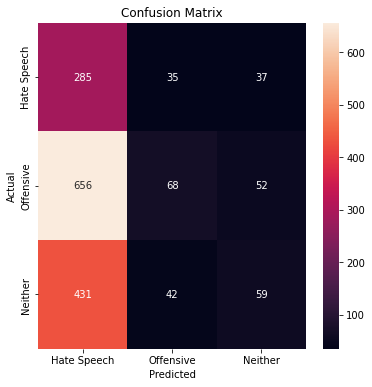

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Create the optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
total_steps = len(train_dataset) * num_epochs // batch_size // gradient_accumulation_steps
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=learning_rate, steps_per_epoch=len(train_dataset)//batch_size, epochs=num_epochs)

# Create a function to compute loss and accuracy
def compute_loss(logits, labels):
    return torch.nn.functional.cross_entropy(logits, labels)

def compute_accuracy(logits, labels):
    preds = torch.argmax(torch.from_numpy(logits), axis=1)
    labels = torch.from_numpy(labels)
    return (preds == labels).float().mean().item()


def save_best_model(model, output_dir, best_val_loss):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    model.save_pretrained(output_dir)
    shutil.copyfile(os.path.join(output_dir, "config.json"), os.path.join(output_dir, "model_config.json"))
    with open(os.path.join(output_dir, "best_val_loss.txt"), "w") as f:
        f.write(str(best_val_loss))

best_val_loss = float('inf')
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size= batch_size, shuffle=True)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size= batch_size, shuffle=True)
scaler = GradScaler()
best_model_dir = '/content/drive/MyDrive/albert_models'
for epoch in range(num_epochs):
    # Train
    train_losses = []
    train_accuracies = []
    train_true_labels = []
    train_predicted_labels = []
    for step, batch in enumerate(train_loader):
        model.train()
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        with autocast():
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs[0]

        # Backward pass and gradient accumulation
        scaler.scale(loss / gradient_accumulation_steps).backward()
        if (step + 1) % gradient_accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()

        predicted_labels = torch.argmax(outputs[1], dim=1).cpu().numpy()
        true_labels = labels.detach().cpu().numpy()
        train_losses.append(loss.item())
        train_accuracies.append(compute_accuracy(outputs[1].detach().cpu().numpy(), labels.detach().cpu().numpy()))
        train_true_labels.extend(true_labels)
        train_predicted_labels.extend(predicted_labels)
        
        train_loss = np.mean(train_losses)
        train_accuracy = np.mean(train_accuracies)
        wandb.log({"Train Loss": train_loss, "Train Accuracy": train_accuracy})
    
    # Compute the precision, recall, and F1 score for the training set
    train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(train_true_labels, train_predicted_labels, average=None)
    wandb.log({"Train Precision - Class 0": train_precision[0], "Train Precision - Class 1": train_precision[1], "Train Precision - Class 2": train_precision[2]})
    wandb.log({"Train Recall - Class 0": train_recall[0], "Train Recall - Class 1": train_recall[1], "Train Recall - Class 2": train_recall[2]})
    wandb.log({"Train F1 Score - Class 0": train_f1[0], "Train F1 Score - Class 1": train_f1[1], "Train F1 Score - Class 2": train_f1[2]})
    
    # Compute the micro-average precision, recall, and F1 score for the training set
    train_micro_precision, train_micro_recall, train_micro_f1, _ = precision_recall_fscore_support(train_true_labels, train_predicted_labels, average='weighted')
    wandb.log({"Train Precision": train_micro_precision, "Train Recall": train_micro_recall, "Train Score": train_micro_f1})

    # Evaluate on the validation set
    val_losses = []
    val_accuracies = []
    val_true_labels = []
    val_predicted_labels = []
    model.eval()
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs[0]
            predicted_labels = torch.argmax(outputs[1], dim=1).cpu().numpy()
            true_labels = labels.detach().cpu().numpy()
            val_losses.append(loss.item())
            val_accuracies.append(compute_accuracy(outputs[1].detach().cpu().numpy(), labels.detach().cpu().numpy()))
            val_true_labels.extend(true_labels)
            val_predicted_labels.extend(predicted_labels)
                # Compute the precision, recall, and F1 score for the training set
    # Compute the precision, recall, and F1 score for the validation set
    val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(val_true_labels, val_predicted_labels, average=None)
    wandb.log({"Val Precision - Class 0": val_precision[0], "Val Precision - Class 1": val_precision[1], "Val Precision - Class 2": val_precision[2]})
    wandb.log({"Val Recall - Class 0": val_recall[0], "Val Recall - Class 1": val_recall[1], "Val Recall - Class 2": val_recall[2]})
    wandb.log({"Val F1 Score - Class 0": val_f1[0], "Val F1 Score - Class 1": val_f1[1], "Val F1 Score - Class 2": val_f1[2]})

    # Compute the micro-average precision, recall, and F1 score for the validation set
    val_precision_micro, val_recall_micro, val_f1_micro, _ = precision_recall_fscore_support(val_true_labels, val_predicted_labels, average='weighted')
    wandb.log({"Val Precision": val_precision_micro, "Val Recall": val_recall_micro, "Val F1 Score": val_f1_micro})


    # Compute the average losses and accuracies
    val_loss = np.mean(val_losses)
    val_accuracy = np.mean(val_accuracies)
    wandb.log({"Validation Loss": val_loss, "Validation Accuracy": val_accuracy})
    # Print the training and validation losses and accuracies
    print(f"Epoch {epoch + 1}/{num_epochs}:")
    print(f"  Train loss: {train_loss:.3f}, Train accuracy: {train_accuracy:.3f}")
    print(f"  Val loss: {val_loss:.3f}, Val accuracy: {val_accuracy:.3f}")
    # Save the best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        save_best_model(model, output_dir=best_model_dir, best_val_loss=best_val_loss)
        tokenizer.save_pretrained(best_model_dir)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load the best model and evaluate on the test set

model = ModifiedAlbertForSequenceClassification.from_pretrained(best_model_dir)
model.to(device)

test_losses = []
test_accuracies = []
predicted_labels = []
true_labels = []
model.eval()
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs[0]
        predicted_labels.extend(torch.argmax(outputs[1], dim=1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())
        test_losses.append(loss.item())
        test_accuracies.append(compute_accuracy(outputs[1].detach().cpu().numpy(), labels.detach().cpu().numpy()))

# Compute the average test loss and accuracy
test_loss = np.mean(test_losses)
test_accuracy = np.mean(test_accuracies)

# Compute the precision, recall, and F1 score for the validation set
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average=None)
wandb.log({"Test Precision - Class 0": test_precision[0], "Test Precision - Class 1": test_precision[1], "Test Precision - Class 2": test_precision[2]})
wandb.log({"Test Recall - Class 0": test_recall[0], "Test Recall - Class 1": test_recall[1], "Test Recall - Class 2": test_recall[2]})
wandb.log({"Test F1 Score - Class 0": test_f1[0], "Test F1 Score - Class 1": test_f1[1], "Test F1 Score - Class 2": test_f1[2]})


# Compute precision, recall, and F1 score
precision, recall, f1, support = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

# Log the metrics to wandb
wandb.log({"Test Loss": test_loss, "Test Accuracy": test_accuracy, "Test Precision": precision, "Test Recall": recall, "Test F1 Score": f1})


# Print the test loss and accuracy
print(f"Test loss: {test_loss:.3f}, Test accuracy: {test_accuracy:.3f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=[0, 1, 2])
class_names = ['Hate Speech', 'Offensive', 'Neither']
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.set_title('Confusion Matrix')
plt.show()